In [23]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


# ETAPA 1: Extração
def extrair_dados():
    url = "https://api.coingecko.com/api/v3/coins/markets"
    parametros = {
        'vs_currency': 'usd',
        'order': 'market_cap_desc',
        'per_page': 10,
        'page': 1,
        'sparkline': False
    }
    resposta = requests.get(url, params=parametros)
    if resposta.status_code == 200:
        return resposta.json()
    else:
        return []

# ETAPA 2: Transformação
def transformar_dados(dados):
    df = pd.DataFrame(dados)
    # Selecionando as Colunas
    df_transformado = df[['id', 'symbol', 'current_price', 'market_cap', 'last_updated']]
    df_transformado['last_updated'] = pd.to_datetime(df_transformado['last_updated'])
    return df_transformado

# Pipeline
def pipeline_etl():
    dados = extrair_dados()
    if dados:
        df = transformar_dados(dados)
        return df
    else:
        print("Erro ao extrair os dados.")
        return None

# Executar
df = pipeline_etl()
display(df)

            id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3       ripple    xrp       XRP   
4  binancecoin    bnb       BNB   
5       solana    sol    Solana   
6     usd-coin   usdc      USDC   
7     dogecoin   doge  Dogecoin   
8      cardano    ada   Cardano   
9         tron    trx      TRON   

                                               image  current_price  \
0  https://coin-images.coingecko.com/coins/images...   94054.000000   
1  https://coin-images.coingecko.com/coins/images...    1804.590000   
2  https://coin-images.coingecko.com/coins/images...       0.999946   
3  https://coin-images.coingecko.com/coins/images...       2.140000   
4  https://coin-images.coingecko.com/coins/images...     594.980000   
5  https://coin-images.coingecko.com/coins/images...     144.840000   
6  https://coin-images.coingecko.com/coins/images...       0.999993   
7  https://coin-images.coingecko.com/coins/ima

<ipython-input-23-16d59e5932df>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transformado['last_updated'] = pd.to_datetime(df_transformado['last_updated'])


,id,symbol,current_price,market_cap,last_updated
0,bitcoin,btc,94054.000000,1868885580234,2025-05-05 14:23:53.511000+00:00
1,ethereum,eth,1804.590000,217929395243,2025-05-05 14:23:54.167000+00:00
2,tether,usdt,0.999946,149349050695,2025-05-05 14:23:54.529000+00:00
3,ripple,xrp,2.140000,125098631786,2025-05-05 14:23:53.490000+00:00
4,binancecoin,bnb,594.980000,86801418869,2025-05-05 14:23:53.224000+00:00
5,solana,sol,144.840000,75077983732,2025-05-05 14:23:53.418000+00:00
6,usd-coin,usdc,0.999993,61564218657,2025-05-05 14:24:00.376000+00:00
7,dogecoin,doge,0.170430,25419997715,2025-05-05 14:23:53.355000+00:00
8,cardano,ada,0.661176,23850553608,2025-05-05 14:23:59.855000+00:00
9,tron,trx,0.249735,23701674997,2025-05-05 14:23:52.972000+00:00


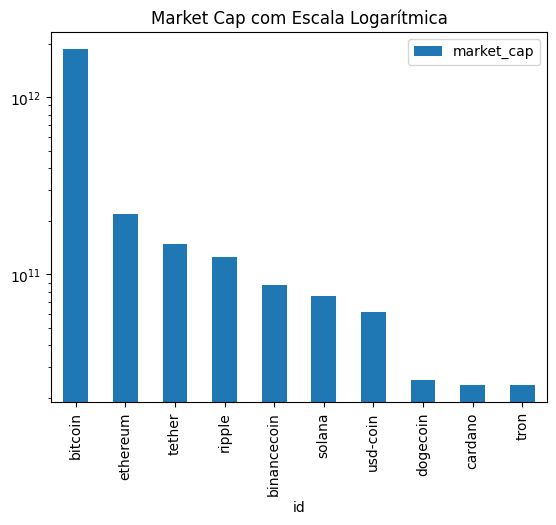

In [22]:

df.plot(kind='bar', y='market_cap', x='id', logy=True)
plt.title('Market Cap com Escala Logarítmica')
plt.show()
